# Introduction to Frequency Response Methods: Bode Plots

In [ ]:
#| default_exp frequency_response

In [ ]:
#| include: false
%load_ext autoreload
%autoreload 2

In [ ]:
#| include: false
from IPython.display import Image
from IPython.display import HTML

# For animations
from matplotlib import animation, rc

In [ ]:
#| hide
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [ ]:
#| export
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# import control

In [ ]:
#| include: false
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams.update({'font.size': 22})

-----------------------

## Frequency response

Given an LTI system with transfer function: $G(s) = C(sI - A)^{-1}B$

and an input signal: $u(t)=Asin(\omega t)$

Assuming that the system is **asymptotically stable**, it is possible to verify that: 

$$y(t)=A|G(j\omega)|sin(\omega t + \angle G(j\omega) ) $$

This means that the output $y(t)$ converges to a sinusoidal signal that has the **same frequency** of the input, and that has magnitude $A|G(j\omega)|$ and is shifted in phase by $\angle G(j\omega)$.

Note also that this is true independently of the initial state $x_0$. In fact, since the system is asymptotically stable, the effect of the initial state on the output will go to zero.

<tr>
<td> <img src="img/26.freq-response.png" alt="freq-response.png" style="width: 550px;"/> </td>
</tr>

Let's see what this means with our LinearCar:

In [ ]:
from feedback_control.intro_to_control_theory import *

In [ ]:
# Let's define its initial conditions
x_0 = (0,0)

# no slope terrain
theta = np.radians(0)

# Define the car parameters
m = 1
alpha = 1
beta = 1
gamma = 1
params = (m, alpha, beta, gamma)

# Create the car
car = LinearCar(x_0, params)

# run it!
t0, tf, dt = 0, 30, 0.1
time = np.arange(t0, tf, dt)

w = 1 # rad/s
u = 1*np.sin(w*time) # SINUSOIDAL INPUT

position = []
velocity = []
time = []
for i, t in enumerate(np.arange(t0, tf, dt)):
    car.step(dt, u[i], theta)
    x_i, y_i, v = car.sensor_i()
    position.append((x_i,y_i)), velocity.append(v)
    time.append(t)

And now we plot it:

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();

ax.set_xlim((min(position)[0], max(position)[0]));
ax.set_ylim((-50, 10));
line, = ax.plot([], [], lw=4);

x_range = np.linspace(int(position[0][0]), int(position[-1][0]), num=20)

# animation function. This is called sequentially
def animate(i):    
    x_min, x_max = position[max(0,i-2)][0], position[i][0]
    y_min, y_max = position[max(0,i-2)][1], position[i][1]
    line.set_data([x_min, x_max], [y_min, y_max])
    return (line,)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=len(time), interval=40, blit=True,
                               repeat_delay=10000, repeat=True);

plt.close()
HTML(anim.to_html5_video())

And if we plot the speed with respect to the input signal:

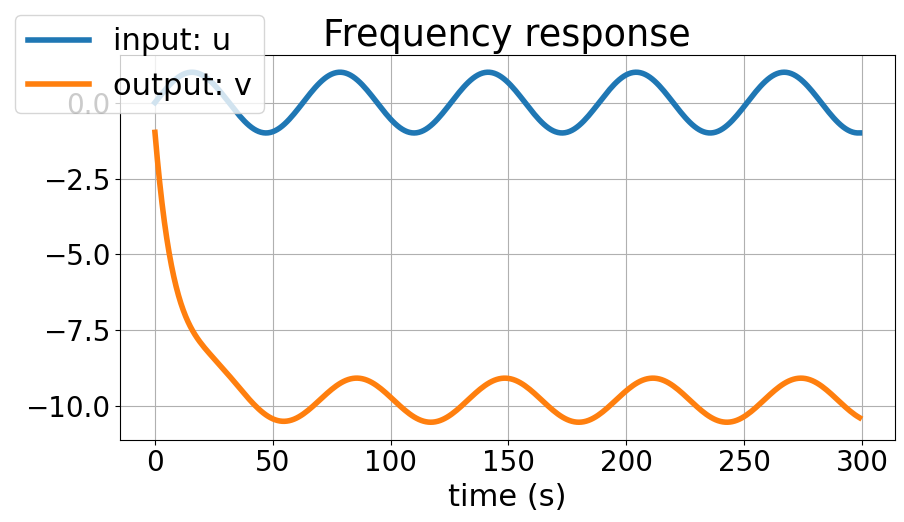

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(u, linewidth=4)
plt.plot(velocity, linewidth=4)
fig.legend(['input: u', 'output: v'], loc='upper left')

plt.title('Frequency response')
plt.xlabel('time (s)')
plt.grid()

### Comments

Given an LTI system with transfer function: $G(s) = C(sI - A)^{-1}B$

and an input signal: $u(t)=Asin(\omega t)$

Assuming that the system is **asymptotically stable**, it is possible to verify that: 

$$y(t)=A|G(j\omega)|sin(\omega t + \angle G(j\omega) ) $$

- The complex function $G(j\omega)$ is called frequency response (or harmonic response) of the system

**If we know magnitude and phase of $G(j\omega)$, as $\omega$ varies, then effectively we know how the system behaves for all sinusoidal inputs with different driving frequencies.**
- It is possible to experimentally determine $G(j\omega)$ which means that we can also reconstruct the transfer function
- $G(j\omega)$ can be represented graphically through Magnitude and Phase diagrams (each one is a Real Function of the real variable $\omega$):
$$G(j\omega)=|G(j\omega)|e^{j\angle G(j\omega)}$$
- This makes it possible to analyse the gain and the phase shift across the full frequency spectrum


- Finally, as a side observation, note that if we have a sinusoidal input $sin(\omega_0 t)$, the output can be zero only if $G(j\omega_0)=0$. This happens if the T.F. $G(s)$ has a pair of imaginary zeros in $j\omega_0$.

**Note:**
- The time of the transient before the output of the system converges towards $y(t)=A|G(j\omega)|sin(\omega t + \angle G(j\omega) ) $ depends on dynamics of the system and can be evaluated using the settling time $t_s$.

------------------------

## Complex numbers and their representation through magnitude and phase

Complex Numbers are a very popular and frequently used aspect of Mathematics. Composed of a real part and an imaginary part, they are written in the form $\mathit{\mathbf{x + iy}}$. 

- $\mathit{\mathbf{x}}$ denotes the real part and $\mathit{\mathbf{iy}}$ denotes the imaginary part. 
- Complex numbers can be represented on an **Argand Diagram**. 

- An **Argand Diagram** is similar to the **Cartesian Coordinate System** except that the Real axis and Imaginary axis replace the $\mathit{\mathbf{X}}$ and $\mathit{\mathbf{Y}}$ axis respectively which you would usually expect see on the Cartesian system. 
For example:

<tr>
<td> <img src="img/27.complex-numbers.png" alt="27.complex-numbers.png" style="width: 350px;"/> </td>
</tr>

The complex number $\mathit{\mathbf{z = x + iy}}$ can hence be also represented as: $$\large \mathit{\mathbf{|z|e^{j\angle z}}}$$

- The Modulus of the Complex Number gives the straight line distance from the origin to the point: $\mathit{\mathbf{|z|=\sqrt{x^2+y^2}}}$
- The Argument gives the angle between the line representing the complex number and the positive real axis: $\angle z = arctan \frac{y}{x}$



<tr>
<td> <img src="img/28.complex_magnitude-argument.png" alt="28.complex_magnitude-argument" style="width: 450px;"/> </td>
</tr>

- Sinusoids can be represented as complex numbers called _phasors_.
- The magnitude of the complex number is the amplitude of the sinusoid, 
- The angle of the complex number is the phase angle of the sinusoid. 

Thus:

$$
M_1 cos(\omega t + \phi_1)
$$

Can be represented as:

$$
M_1\angle \phi_1
$$

where the frequency $\omega$ is implicit.

------------------------------

## Frequency Response and Bode Plots

The objective is that of analysing the gain and the phase shift across the full frequency spectrum.

Let's now suppose that we have one simple system:

<tr>
<td> <img src="img/29.simple-system.png" alt="29.simple-system" style="width: 450px;"/> </td>
</tr>

When we have $u(t)=\sin(0.5t)$, the output of this system is:

$$y(t)=2\sin(0.5t)+\int \sin(0.5t)dt = 2\sin(0.5t) - \frac{1}{0.5}\cos(0.5t)$$

Since (Trigonometry Identity):
> $a \sin x + b \cos x = \sqrt{a^2+b^2}\sin(x+\phi)$, where $\phi=\tan^{-1}\frac{b}{a}$

We can then write:
$$y(t)=2\sin(0.5t)+\int \sin(0.5t)dt = 2\sin(0.5t) - 2\cos(0.5t) = \sqrt{8} \sin(0.5t + \tan^{-1}(-1)) \approx 2.83 \sin(0.5t-0.785)$$



This gives the output for one frequency $\omega$.

More often though we are going to be interested in a range of frenquecies, and to represent the gain and phase shift across the frequency spectrum we can use **Bode Plots**
- They plot frequency response information to be displayed graphically on two diagrams: gain and phase (plotted against frequency on a logarithmic horizontal axis)


**Note**
- To plot the gain on a Bode diagram we do not plot the gain directly
- We first convert the gain into Power, and then we represent the gain in dB (a logarithmic unit)
- To convert the amplitude to decibel: $20\log_{10}\frac{A}{A_0}$
   - This comes from quantifying loss in audio levels through telephone circuits - units of measurement that could cover a large range of audio power differences. Since the ear responds to sound pressure logarithmically using a log scale corresponds to the way humans perceive sound.
   - $1 \text{TU} = 10\log_{10} \Delta \text{Power Loss}$
   - $1 \text{TU}$ was the smallest power attenuation detectable by the average listener
   - $1 \text{TU}$ was later renamed after Alexander Bell as decibel (1/10 bel): $1 TU = \frac{1}{10}\text{bel} = 1 \text{dB}$
   - Since $\text{Power} \propto \text{Amplitude}^2$ we can write the equation with respect to amplitude:
      - $1 \text{dB} = 10\log_{10} \text{Amplitude}^2 = 20\log_{10} \text{Amplitude}$ (*properties of logarithms*)
   


In our case:
- $y(t) = 2.83 \sin(0.5t-0.785)$
- Gain: $20 \log_{10}(2.83) \approx 9 \text{dB}$
- Phase: $-0.785 \text{rad} = -45 \text{deg}$




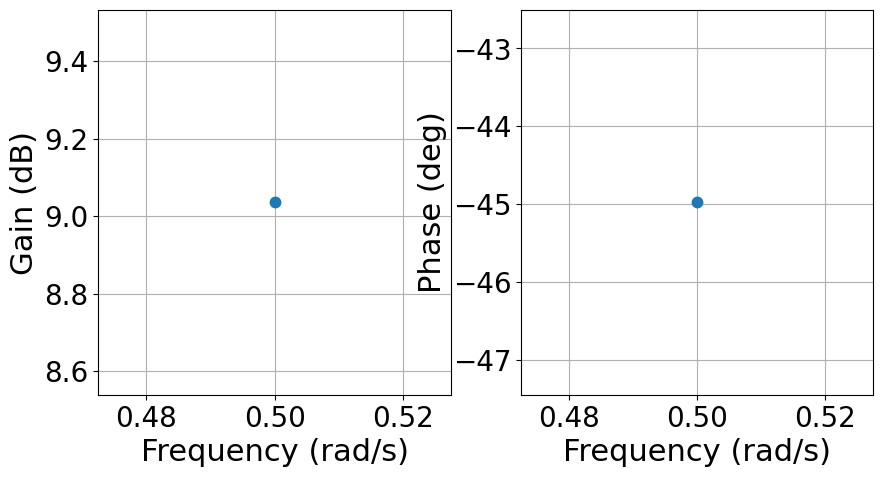

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5));

axs[0].plot(0.5, 20*np.log10(2.83), marker='.', markersize=15)
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Gain (dB)');
axs[0].grid()

axs[1].plot(0.5, np.degrees(-0.785), marker='.', markersize=15)
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Phase (deg)');
axs[1].grid()

- This is the frequency response for a single sine wave.
- We are interested in plotting the gain and phase across the entire frequency spectrum

We can manually calculate the frequency response for all possible values of $\omega$:

$$
y_t = \sqrt{2^2+\frac{1}{w}^2} sin(wt + \tan^{-1} \big(\frac{-1/w}{2}\big) )
$$


And we can plot for a finite number of values of $\omega$

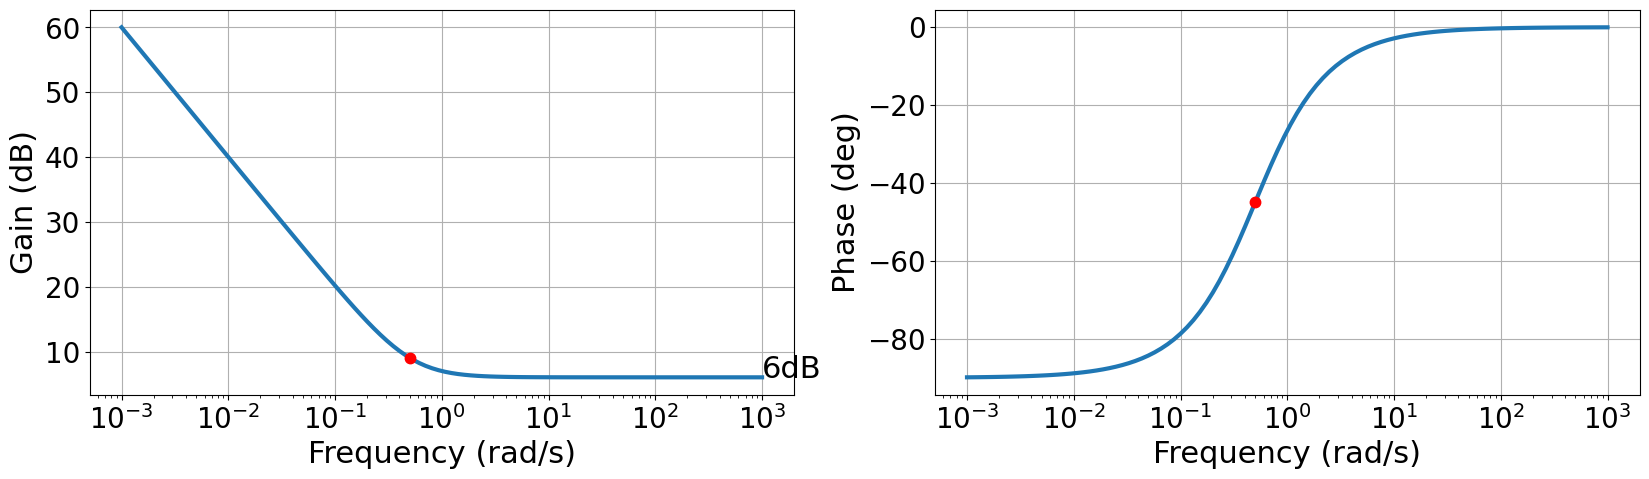

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5));

ws = np.logspace(-3, 3, 100) # logspace sets the exponents

gain, phase = [], []
for w in ws:
    # y_t = np.sqrt(2**2+1/w**2) * sin(w*t + np.atan2(-1/w, 2))
    gain.append(np.sqrt(2**2 + (1/w)**2))
    phase.append(np.arctan2(-1/w, 2))
    
# Gain diagram
axs[0].plot(ws, 20*np.log10(gain), linewidth=3)
axs[0].plot(0.5, 20*np.log10(2.83), marker='.', markersize=15, color='red')    
axs[0].set_xscale('log')
axs[0].grid('log')
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Gain (dB)');
axs[0].text(10**3, 20*np.log10(2), '6dB')

# Phase diagram
axs[1].plot(ws, np.degrees(phase), linewidth=3)
axs[1].plot(0.5, np.degrees(-0.785), marker='.', markersize=15, color='red')    
axs[1].set_xscale('log')
axs[1].grid('log')
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Phase (deg)');

- For this simple example, solving the response to the sine wave input is quite straightforward. But what about a more general case?
- We can obtain the result using directly the transfer function.

The system we had was:
<tr>
<td> <img src="img/29.simple-system.png" alt="29.simple-system" style="width: 450px;"/> </td>
</tr>

This can be written as:

$$G(s)= \bigg (2 + \frac{1}{s} \bigg ) = \frac{2s+1}{s}$$

which means:

$$y(t) = \frac{2s+1}{s} u(t) $$

Recall that: $s=\sigma + j\omega$ (complex variable)

- When we calculate the frequency response we are interested in the state state response, once all the transients have died out (or in other words, when $\sigma=0$).

- So for steady state: $s=j\omega$

We can then calculate **steady state gains and phases** directly substituting in the transfer functions $s=j\omega$:

$$\frac{2s+1}{s} \big |_{s=j\omega} \rightarrow \frac{2j\omega+1}{j\omega} = 2-\frac{1}{\omega}j$$

We can then plot these real and imaginary components on the Real-Imaginary axis, and we can calculate gain and phase geometrically from these plots.

And for $\omega=0.5$ 

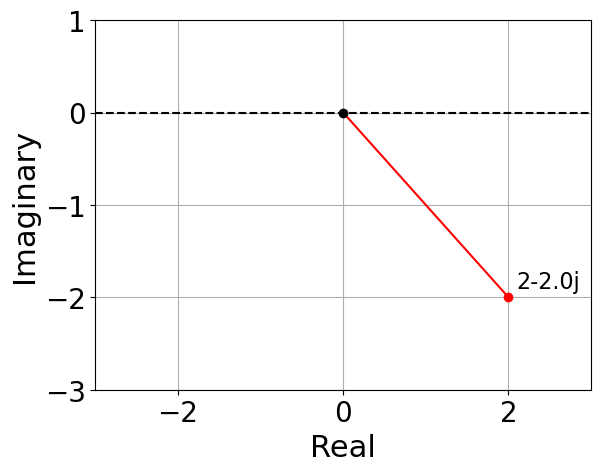

In [ ]:
fig = plt.figure()

w = 0.5 # THIS IS OUR SPECIFIC FREQUENCY OF INTEREST

def plot_imre(w, display_text=1):
    plt.plot([-3, 6], [0, 0], color='black', linestyle='--') # this plots the real axis
    plt.plot([0, 2], [0, -1/w], color='red')                 # THIS PLOTS OUR VECTOR
    plt.plot(0, 0, marker='.', markersize=12, color='black'); # Make it prettier: plot the black dot
    plt.plot(2, -1/w, marker='.', markersize=12, color='red'); # Make it prettier: plot the red dot
    if display_text: plt.text(2+0.1, -1/w+0.1, '2-{:.1f}j'.format(1/w), size=16) # add a text


plot_imre(w)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axis([-3, 3, -3, 1])
plt.grid()

- The length of the line is the **Gain** of the system: $l=\sqrt{real^2+imag^2}$
- The angle between the line and the positive real line is the **Phase**: $\angle=\text{atan2(imag, real)}$

And if we speed across the frequencies, from $0$ to $\inf$, we can obtain a visual understanding of what the gain and phase are doing for this system:
- $w \rightarrow 0$, $\Rightarrow$, $imag \rightarrow \inf$
- $w \rightarrow \inf$, $\Rightarrow$, $imag \rightarrow 0$

And we can plot a few examples:

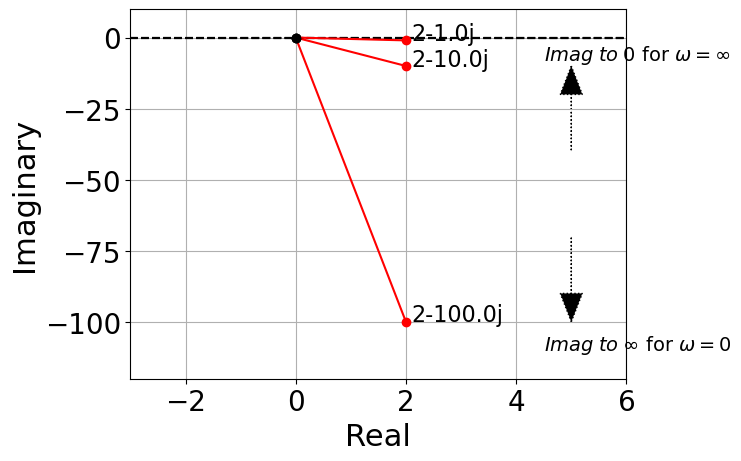

In [ ]:
fig = plt.figure()
ws = np.logspace(0.001, 10, 100)

ws = [0.01, 0.1, 1]
for w in ws:
    plot_imre(w)
    
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axis([-3, 6, -120, 10])
plt.grid()

# add a note on the plot to show the direction of w
plt.arrow(5, -40, 0, 30, head_width=0.4, head_length=10, length_includes_head=True, color='k', linestyle=':')
plt.arrow(5, -70, 0, -30, head_width=0.4, head_length=10, length_includes_head=True, color='k', linestyle=':')
plt.text(4.5, -8, '$Imag\; to\; 0$ for $\omega=\infty$', fontsize=14)
plt.text(4.5, -110, '$Imag\; to\; \infty$ for $\omega=0$', fontsize=14);

The real part never changes.

For this system:

**Gain**
- As $\omega$ decreases, the Gain increases ($\inf$ for $\omega=0$)
- As $\omega$ increases, the Gain decreases (2 for $\omega=\inf$)

**Phase**

- As $\omega$ decreases, the Phase increases ($-90^o$ for $\omega=0$)
- As $\omega$ increases, the Phase decreases (0 for $\omega=\inf$)




------------------

### Let's be more formal

- The transfer functions of linear systems are polynomial fractions in $s$
- It is always possible to factor polynomials in terms of their roots (zeros and poles)
- Each polynomial is the product of first-order or second-order (potentially with multiplicity $>$ 1)
- To build the frequency response of the system is useful to have simple rules to represent each term
- We can leverage the properties of the logarithms: the logarithm of a product is equal to a sum of logarithms:
     - $ \log(AB) = \log(A)+\log(B) $
     - $ \log(A/B) = \log(A)-\log(B)$
     - $ \log(y^x) = x\log(y)$

### Magnitude and Phase

$$\large G(s) = \frac{(s-z_1)(s-z_2)...}{(s-p_1)(s-p_2)...}$$ 

$$\Downarrow$$

$$\large G(jw) = \frac{|j\omega-z_1|e^{j\angle j\omega -z_1} |j\omega-z_2|e^{j\angle j\omega -z_2} ...}{|j\omega-p_1|e^{j\angle j\omega -p_1} |j\omega-p_2|e^{j\angle j\omega -p_2} ...} $$ 

$$\Downarrow$$ 

$$\large G(jw) = \frac{|j\omega-z_1||j\omega-z_2|...e^{j(\angle j\omega -z_1 + \angle j\omega -z_2 + ...)}}{|j\omega-p_1||j\omega-p_2|...e^{j(\angle j\omega -p_1 + \angle j\omega -p_2 + ...)}} $$

and:

$$\large |G(jw)| = \frac{|j\omega-z_1||j\omega-z_2|...}{|j\omega-p_1||j\omega-p_2|...}$$

$$\large \angle  G(jw)| = +\angle (j\omega -z_1)+\angle (j\omega -z_2)+ ... -\angle (j\omega -p_1)-\angle (j\omega -p_2) - ...$$



---------------------

### Bode Amplitude Plot

- In the amplitude plot, it is convenient to report the value of the magnitude in _decibel_ or _dB_.
- By convention, the dB value of a positive quantity $x$ is: $20\log_{10}(x)$.
- This means: $|G(j\omega)|_{dB}=20log|G(j\omega)|$

- Note that when:
   - $|G(j\omega)|_{dB} > 0 \rightarrow |G(j\omega)| > 1$
   - $|G(j\omega)|_{dB} < 0 \rightarrow |G(j\omega)| < 1$
   - $|G(j\omega)|_{dB} = 0 \rightarrow |G(j\omega)| = 1$
   
   
When we use dB things become simpler:

$\large |G(jw)| = \frac{|j\omega-z_1||j\omega-z_2|...}{|j\omega-p_1||j\omega-p_2|...}$ $\Rightarrow$

$$\large |G(j\omega)|_{dB}=20\log|G(j\omega)| = 20\log(|j\omega-z_1|) + 20\log(|j\omega-z_2|) + ... \\
               \large - 20\log(|j\omega-p_1|) - 20\log(|j\omega-p_2|) ...$$



- It is convenient to use a logarithmic scale for the $w$-axis. 
- Logarithmic scales are useful when plotting functions that vary over many orders of magnitude.
- One term we will use in our discussion of frequency response plots is “decade”. A decade change in frequency is a factor of ten. So, for example, 1 kHz is a decade above 100 Hz and a decade below 10 kHz.

### Sketching Bode Plots 

- Being able to quickly draw Bode plots is important
   - They provide an intuitive understanding how poles and zeros affect the frequency response
   - Make it possible to estimate the transfer function looking at the frequency response (e.g. estimate of the transfer function from the output of a frequency sweep that we are providing to the system)
   

**Recall**

- Given a transfer function $G(s)$ we can obtain the (steady state) frequency response setting $s=j\omega \rightarrow G(j\omega)$

- Remember also that $G(j\omega) = \text{real} + \text{imag}j $

- If we plot it on the Real-Imag diagram:

<tr>
<td> <img src="img/37.H_jw_text.png" alt="37.H_jw" style="width: 350px;"/> </td>
</tr>

- Gain: $\sqrt{\text{real}^2 + \text{img}^2} = |G(j\omega)|$
- Phase: $atan2(\text{img}, \text{real}) = arg(G(j\omega)) = \angle G(j\omega)$

- The sign of the phase is determined based on which side of the real line it appears

<tr>
<td> <img src="img/38.H_jw_multiple_points-1.png" alt="38.H_jw" style="width: 350px;"/> </td>
</tr>

## Representing the simplest transfer function on a Bode Plot

- $G(s) = K$
- where $K \in R$ can be positive of negative

We apply the definition
- Gain = $|G(j\omega)| = |K| = \text{positive K}$
- Phase = $\text{atan2}(img, real)= \text{atan2}(0, K)$  
   - The img part is zero in our case

If we plot this on the real-img axis, all values would lie on the real axis (imaginary component is zero)

<tr>
<td> <img src="img/39.H_jw_K-1.png" alt="39.H_jw_K.png" style="width: 450px;"/> </td>
</tr>

- The gain is always $K$ (distance from the origin)
- $K$ can be positive or negative, 
   - For $K > 0$, Phase = $0$,
   - For $K < 0$, Phase = $180^o=-180^o$, but traditionally use $-180^o$
      - if we use $\text{atan2}$ we already keep track of the sign.

### Represent on a Bode Plot

**Gain**
- We need to remember to convert the gain to dB: $|H(j\omega)| = 20\log_{10}|K|$
- Then it is just a constant for all frequencies, so it is a straight line

**Phase**
- Constant for all frequencies
- $K>0$, Phase = $0^o$
- $K<0$, Phase = $-180^o$


<tr>   
    <td> <img src="img/40.Bode_H_jw_K-1.png" alt="40.Bode_H_jw_K" style="width: 750px;"/> </td>
</tr>

**What is happening in time?**

The system that we are considering is:

<tr>
    <td> <img src="img/41.sinwt.png" alt="41.sinwt" style="width: 550px;"/> </td>
</tr>


- Input is $\sin(\omega t)$
- Output is $K\sin(\omega t)$, which is a sinusoid with the same frequency, but scaled by $K$ (and shifted in phase if $K<0$ by -180 deg).

<tr>
    <td> <img src="img/42.sinwt_shift.png" alt="42.sinwt_shift" style="width: 450px;"/> </td>
</tr>


------------------------

## Bode Plot of the Integrator

- Consider a system that has a single pole at the origin. 
- The steady-state frequency-response is determined by letting $s \rightarrow j\omega$:

$$G(s) = \frac{1}{s} \Rightarrow G(j\omega)=\frac{1}{j\omega} = -\frac{1}{w}j$$

-----
**Side note**
$$
j=\sqrt{-1}$$
Therefore:
$$
\frac{1}{j} = \frac{1}{\sqrt{-1}}\frac{\sqrt{-1}}{\sqrt{-1}} = \frac{\sqrt{-1}}{-1} = -\sqrt{-1}=-j
$$

-----

Given
$G(j\omega)= -\frac{1}{w}j$

- Real component is 0
- Imaginary component is $-\frac{1}{w}$

- Gain = $|G(j\omega)| = \big | -\frac{1}{w}j \big | = \frac{1}{\omega}$: 
- Phase = $\arg G(j\omega) = \arg \big(-\frac{1}{w}, 0 \big) = -90^o$ 

We can see this graphically on the real-img axis:

<tr>
    <td> <img src="img/43.H_jw_integrator_bode-1.png" alt="43.H_jw_integrator_bode" style="width: 350px;"/> </td>
</tr>


Another way to look at this is through a block diagram
<tr>
    <td> <img src="img/44.H_jw_integrator_time_one_s.png" alt="44.H_jw_integrator_time" style="width: 550px;"/> </td>
</tr>



- And if we plot it, we see that the resulting signal has a -90 deg phase shift:

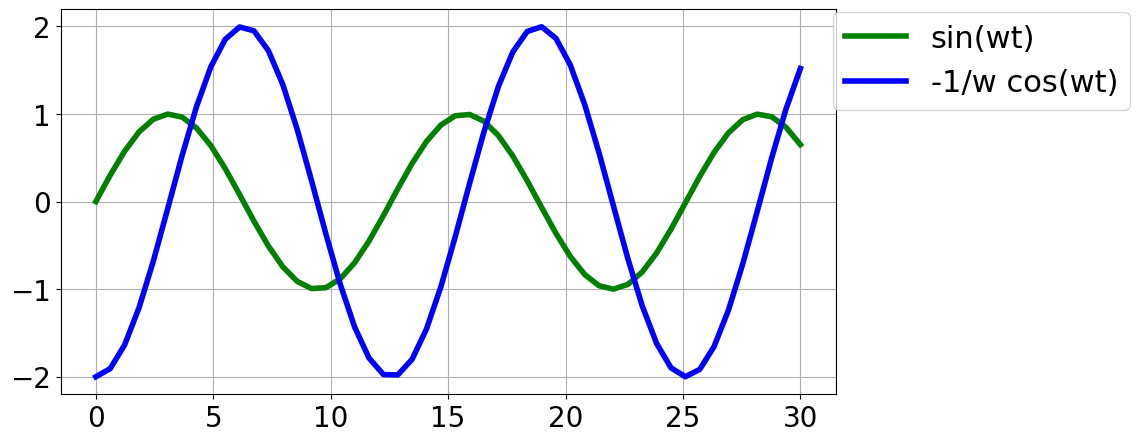

In [ ]:
fig = plt.figure(figsize=(10,5))

t = np.linspace(0, 30, 50)
w = 0.5

plt.plot(t, np.sin(w*t), color = 'green', label='sin(wt)', linewidth=4)
plt.plot(t, -1/w*np.cos(w*t), color = 'blue', label='-1/w cos(wt)', linewidth=4)

rc('font', **{'size':22})
plt.grid()
plt.legend(loc="lower right", bbox_to_anchor=(1.4,0.7));

Let's se what the Bode plot looks like:

- Gain = $\large |G(j\omega)| = \big | -\frac{1}{w}j \big | = \frac{1}{\omega}$: 

   - when $\omega = 1 \; \text{rad/s}$, then gain = 1, $\rightarrow 20\log_{10}1=0 \text{dB}$
   - when $\omega = 10 \; \text{rad/s}$, then gain = 1/10, $\rightarrow 20\log_{10}1=-20 \text{dB}$
   - $|G(j\omega)|_{dB}=20\log\big|\frac{1}{j\omega}\big| = -20\log(\omega)$
   - Given that we are using a logarithmic scale on both axis, this corresponds to a straight line with a -20dB slope every "decade".



- Phase = $\arg \big(-\frac{1}{w}, 0 \big) = -90^o$ at all frequencies



We can plot it

<tr>
    <td> <img src="img/integrator-bode.png" alt="integrator-bode" style="width: 550px;"/> </td>
</tr>




We can also use the [Python Control Systems](https://web.math.princeton.edu/~cwrowley/python-control/index.html) Library for this.

> The Python Control Systems Library is a Python module that implements basic operations for analysis and design of feedback control systems.

In [ ]:
import control

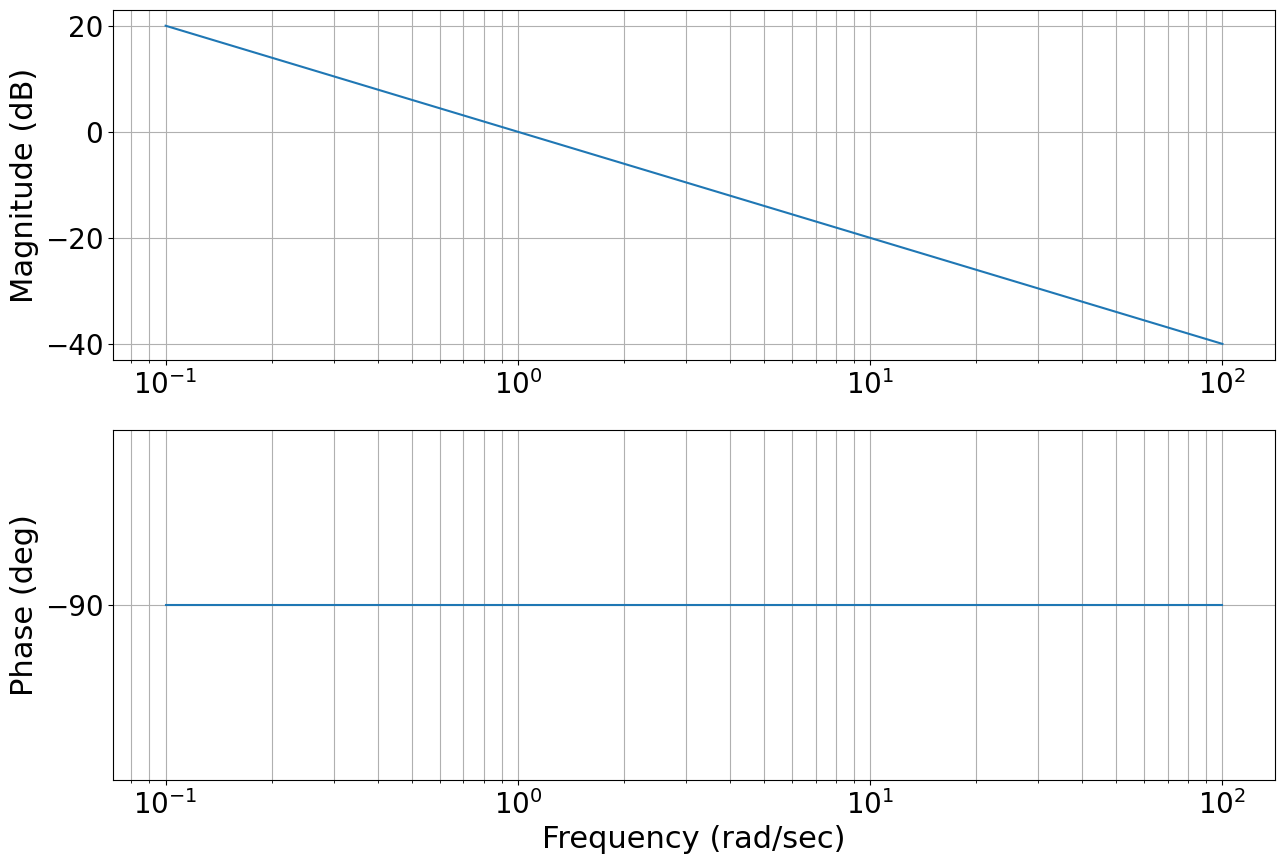

In [ ]:
fig = plt.figure(figsize=(15,10))

# integrator: 1/s = 1/(s+0)
num = [1]
den = [1, 0]

control.bode_plot(control.tf(num, den), dB=True, omega_limits=(0.1, 100));

### What about a zero?

- $G(s)=s$

- It is easy to calculate this from what we know already.
- For example we can use the property of logarithms to say: $G(s)=s = \frac{1}{1/s} \Rightarrow 1 - \frac{1}{s}$

- So the gain of a zero is simply the negative of the gain of a pole (reflection about the real axis)
- And the phase of a zero is +90 deg

<tr>
    <td> <img src="img/zero-bode.png" alt="zero-bode" style="width: 550px;"/> </td>
</tr>


--------------------

## Frequency Response of Simple Poles and Zeros

### Transfer function with a single real pole 

- Given a transfer function G(S), re-write the transfer function in the Bode form: 
$$
\frac{1}{1+\frac{s}{w_0}}
$$ 
   - ex. 
       - $\large G(s)=\frac{1}{s+1} \Rightarrow \frac{1}{1+\frac{s}{w_0}}$
       - we call $w_0$ "break frequency" or "corner frequency"
   - Sometime you also see it written as:
       - $\large G(s)=\frac{w_0}{s+w_0} = \frac{1}{1+\tau s}$
       - where $\tau = \frac{1}{w_0}$ is called _Time constant_
   - All these representations are equivalent
   

- To be clear:
  - A real pole has an effect on the frequency response
 

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/44.1.real-pole-1.png" alt="45.H_jw_real_pole_bode_0" style="width: 350px;"/> 
    <td> <img src="img/44.2.real-pole-2.png" alt="45.H_jw_real_pole_bode_0" style="width: 350px;"/> </td>
</tr> 
</table>    

Now, given a transfer function with a single real pole:

$$
\large G(s)= \frac{1}{1+\frac{s}{w_0}} \hspace{0.2cm}  \large \xrightarrow{Set\; s=j\omega} \hspace{0.2cm} \large\frac{1}{1+\frac{j\omega}{w_0}}
$$

We are trying to separate the real part and the imaginary part:

$$\large\frac{1}{1+\frac{j\omega}{w_0}} = \frac{1}{1+j\frac{\omega}{w_0}} \frac{1-j\frac{\omega}{w_0}}{1-j\frac{\omega}{w_0}} = \frac{1-j\frac{\omega}{w_0}}{1+\frac{\omega^2}{w_0^2}}$$

_Note: $1-j\frac{\omega}{w_0}$ is the complex conjugate of $1+j\frac{\omega}{w_0}$_

- Real part = $\large \frac{1}{1+\frac{\omega^2}{\omega_0^2}}$

- Imaginary part = $\large \frac{-\frac{\omega}{\omega_0}}{1+\frac{\omega^2}{\omega_0^2}}$

And now we can solve for the gain and phase as we did before:

- Gain: $$ 20\log_{10}\big | H(j\omega) \big | = \sqrt{ real^2 + img^2 } = \sqrt{ \frac{1}{1+\frac{\omega^2}{\omega_0^2}} } \xrightarrow{in \; \text{dB}} -20\log_{10}\bigg( \sqrt{1+\frac{\omega^2}{\omega_0^2}} \bigg)$$


- Phase: $$\arctan\frac{\text{img}}{\text{real}}=\arctan\frac{-w}{w_0}$$


And now we can plot them:

- case 1: $w \ll w_0 \rightarrow \frac{\omega^2}{\omega_0^2} \rightarrow 0$, 
    - Gain: $-20\log_{10} 1 = 0\; \text{dB}$
    - Phase: $\arctan(0) = 0\; \text{degrees}$
    
    
<tr>
    <td> <img src="img/45.H_jw_real_pole_bode_0.png" alt="45.H_jw_real_pole_bode_0" style="width: 550px;"/> </td>
</tr>    
    

- case 2: $w = w_0 \rightarrow \frac{\omega^2}{\omega_0^2} = 1$, 
    - Gain: $-20\log_{10}\sqrt{2} = -3 \; \text{dB}$
    - Phase: $\arctan(-1) = -45\; \text{degrees}$
    
    
<tr>
    <td> <img src="img/46.H_jw_real_pole_bode_1_1.png" alt="46.H_jw_real_pole_bode_1.png" style="width: 550px;"/> </td>
</tr>    
    

- case 3: $w \gg w_0$, 
    - The term $\frac{\omega^2}{\omega_o^2}$ dominates the gain equation
    - Gain: $-20\log_{10}\frac{\omega}{\omega_o}$
       - Every time $\omega$ gets 10 times bigger, there is a drop in gain of -20 dB
       - $-20 \; \text{dB}/\text{decade}$ slope and intercepts 0 at $\omega_0$
    - Phase: $\arctan(-\frac{\omega}{\omega_o})=\arctan(-\inf) = -90\; \text{degrees}$
    
    
<tr>
    <td> <img src="img/47.H_jw_real_pole_bode_2.png" alt="47.H_jw_real_pole_bode_2.png" style="width: 550px;"/> </td>
</tr>    
    
- This is called the asymptotic Bode plot, which is an approximation of the actual plot.

**What does the actual Bode plot look like?**

<tr>
    <td> <img src="img/48.H_jw_real_pole_bode_actual.png" alt="48.H_jw_real_pole_bode_actual.png" style="width: 550px;"/> </td>
</tr>    

And for this reason, sometimes we use a different approximation of the phase:

<tr>
    <td> <img src="img/49.H_jw_real_pole_bode_2_v2.png" alt="48.H_jw_real_pole_bode_actual.png" style="width: 550px;"/> </td>
</tr>    

### Transfer function with a single real zero

- $G(s) = s + z$

- It is easy from what we know already

- One way to do it is to reshape it as: 
   $$G(s) = s + z = \frac{1}{\frac{1}{s+z}} = \frac{1}{\frac{1}{1+\frac{s}{w_0}}} = 1 + \frac{s}{w_0}$$

- And now we can simply use the property of the logarithm: 
  - _real zero_ is _- real pole_ when plotted on a log-log Bode plot.
 
- Gain slops up at 20 dB/decade (at $w_0$)
- Phase goes from 0 to 90 degrees.

### Summary

- Write the transfer function as: $\frac{1}{1+\frac{s}{w_0}}$ (pole) or as $1 + \frac{s}{w_0}$ (zero)
- Find the break frequency $w_0$ on the log-log Bode plot
- Gain: find and draw the two asymptotes (0 dB until $w_0$, then -20dB/decade (pole) or 20dB/decade (zero))
- Phase: draw the two asymptotes (0 until $w_0$, then -90 deg (pole), 90 deg (zero)
     - Optional: use the better approximation

**One more comment:**

- If you have a $G(s)=\frac{1}{s+4}$ you can always refactor it to the form we would like:
$$G(s)=\frac{1}{s+4} = \frac{1}{4}\frac{1}{1+\frac{s}{4}}$$
- $\frac{1}{4}$ is the gain, and the break frequency $w_0=4$ rad/s

------------------------------

### Transfer function with a pair of complex poles / zeros 

Let's now consider a transfer function of the form:

$$H(s) = \frac{\omega_o^2}{s^2+2\xi\omega_o s+\omega_o^2}$$

The roots of the denominator (the poles) are:

$$s=-\xi\omega_o \pm \omega_o\sqrt{\xi^2-1}$$

- $w_o$ is the break frequency
- $\xi$ dumping ratio 
- if $\xi > 1$, the second-order response has two simple real poles and we know how to deal with that already.
- if $0<\xi < 1$, we have stable complex-conjugatee pole pairs.

First, like we did before, we want to manipulate the form to bring it to the Bode form:

$$H(s) = \frac{1}{\frac{s^2}{\omega_o^2}+2\xi\frac{\omega_o}{\omega_o^2} s+ \frac{\omega_o^2}{\omega_o^2}} = \frac{1}{\frac{s^2}{\omega_o^2}+2\frac{\xi}{\omega_o} s+ 1} $$

Second, we substitute $s=j\omega$ and solve for the real and img parts:

$$H(j\omega) = \frac{1}{-\frac{\omega^2}{\omega_o^2}+2j\xi\frac{\omega}{\omega_o} + 1}$$ 



- Real = $\frac{ 1 - \big(\frac{w}{w_0}\big)^2}{ \bigg[1 - \big(\frac{w}{w_0}\big)^2 \bigg]^2 + \bigg[2\xi \frac{w}{w_0} \bigg]^2}$


- Imaginary = $\frac{- 2\xi \frac{w}{w_0}}{ \bigg[1 - \big(\frac{w}{w_0}\big)^2 \bigg]^2 + \bigg[2\xi \frac{w}{w_0} \bigg]^2}j$


We can use these to estimate the Gain and Phase.

- Case 1: $w \ll w_0$,
   - $\frac{w}{w_0}$ is very small $\Rightarrow$ Real = 1, Img = 0
   - $|H(j\omega)|_{dB} = 20\log(1) = 0$ dB
   - $\arg H(j\omega) = \arctan\frac{0}{1} = 0$ deg
   
   
   
<tr>
    <td> <img src="img/50.H_jw_complex_pole_bode_1.png" alt="50.H_jw_complex_pole_bode" style="width: 550px;"/> </td>
</tr>       


- Case 2: $w \gg w_0$,
   - $1 - \big( \frac{w}{w_0} \big)^2 \approx - \big( \frac{w}{w_0} \big)^2$ $\Rightarrow$ Real = $-\big( \frac{w}{w_0} \big)^{-2}$, Img = $-2\xi \big( \frac{w}{w_0} \big)^{-3}$
   - $|H(j\omega)|_{dB} = 20\log\big( \frac{w}{w_0} \big)^{-2} = -40\log(\frac{w}{w_0})$ dB
       - Note that the real component dominates (there is a square) over the imaginary component
       - -40 dB/decade drop in gain
   - $\arg H(j\omega) = \arctan2 \big(  -2\xi \big( \frac{w}{w_0} \big)^{-3}, -\big( \frac{w}{w_0} \big)^{-2}   \big) = -180$ deg
       - This is because both real and imaginary components are negative and the imaginary component goes to zero faster than the real component.
   
   
   
<tr>
    <td> <img src="img/51.H_jw_complex_pole_bode_w_gg_w0_1.png" alt="51.H_jw_complex_pole_bode_w_gg_w0.png" style="width: 550px;"/> </td>
</tr>       



-Case 3: $w = w_0$,
   - $\frac{w}{w_0} = 1$, Real = 0, Img = $-\frac{1}{2\xi}$
   - $|H(j\omega)|_{dB} = 20\log_{10}(\frac{1}{2\xi})$ dB = $-20\log_{10}(2\xi)$ dB
       - Strongly depends on the parameter $\xi$, the _damping ratio.
       - When $\xi=0.5 \rightarrow -20\log_{10}(1)=0$dB (no peak)
       - When $\xi > 0.5$ then the peak goes slightly down at $w_0$
       - When $\xi < 0.5$ peak of magnitude $-20\log_{10}(2\xi)$
       - When $\xi = 0$ (no dumping) peak goes to $\inf$
       - -40 dB/decade drop in gain
   - $\arg H(j\omega) = \arctan(\inf) = -90$ deg  (remember the quadrant)
       - The slope of the line however changes as a function of $\xi$
   
In case $\xi = 0.3$:

<tr>
    <td> <img src="img/52.H_jw_complex_pole_bode_w_eq_w0_1.png" alt="52.H_jw_complex_pole_bode_w_eq_w0.png" style="width: 550px;"/> </td>
</tr>       




**How does the actual plot look like?**
<tr>
    <td> <img src="img/52.H_jw_complex_pole_bode_w_eq_w0_actual_1.png" alt="52.H_jw_complex_pole_bode_w_eq_w0_actual.png" style="width: 550px;"/> </td>
</tr>       

- Remember: - This is still an approximation!

To do a better approximation of the phase, sometime we identify $w_0^- = \frac{w_0}{5^\xi}, w_0^+ = w_05^\xi$ and we connect them with a straight line.

Here is a more accurate representation of the Bode plots for a pair of complex poles and how their response changes with $\xi$.

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/34.complex-poles-amplitude-corrected.png" alt="34.complex-poles-amplitude-corrected" style="width: 450px;"/> </td>
<td> <img src="img/36.phase-complex-roots.png" alt="36.phase-complex-roots" style="width: 450px;"/> </td>
</tr>
</table>

**Transfer function with a pair of complex zeros**
- The frequency response of complex zeros can be obtained from what we know already
- Reflection of the response of a pole about the horizontal axis.


### Final comments

- Drawing Body plots is easy once we understand the key rules
- Makes it possible to understand how adding poles/zeros changes the frequency response of the system
- Really useful when desigining controllers or filters

------------------------

### OK, really the final comment - Bode plot of a delay

The transfer function of a delay is $G(s)=e^{-s\tau}$.

The frequency response $G(j\omega)=1 e^{-j\omega\tau}$ is already a phasor!

$$|e^{-j\omega\tau}| = 1$$
$$\angle e^{-j\omega\tau} = -\omega \tau$$

- A delay $\tau$ introduces a phase shift proportional to the delay and to the frequency.

----------------------------------------

## Exercises

### Exercise 1

Draw the Bode plot of the system:

$$
G(s) = \frac{10^3(s+0.1)}{s(s+1)^2}
$$

- zeros: $(s+0.1)=0 \Rightarrow s=-0.1$
- poles: $s(s+1)^2=0  \Rightarrow s=0, s=-1$ (with multiplicity 2)


Write the frequency response, setting $s=j\omega$ as:

$$
G(j \omega) = \frac{10^3 0.1 \big (1+\frac{j\omega}{0.1} \big )}{j \omega( 1 + j \omega )^2}
$$

- Given that we have a pole at the origin we know that the plot starts with a slope of $-20 \text{dB/decade}$, and passing through $w=1 \text{rad/s}$
- Constant Gain: $K=0.1 \cdot 10^3 \Rightarrow 20\log_{10}(10^2)=40$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-1-2-pole-origin.png" alt="ex-1-2-pole-origin" style="width: 650px;"/> </td>
</table>

- Zero in $s=0.1$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-1-3-zeros.png" alt="ex-1-3-zeros" style="width: 650px;"/> </td>
</table>

- Poles in $s=1$ with multiplicity 2

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-1-4-double-pole.png" alt="ex-1-4-double-pole" style="width: 650px;"/> </td>
</table>

- Summing all contribution together:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-1-5-final.png" alt="ex-1-5-final" style="width: 650px;"/> </td>
</table>

- And we can refine our plot a bit:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-1-5-final-exact.png" alt="ex-1-5-final-exact" style="width: 650px;"/> </td>
</table>

And finally we can ask the Python Control library to plot it for us:

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
num = [10**3, 10**3*0.1]
den = [1, 2, 1, 0]
control.bode_plot(control.tf(num, den), dB=True, omega_limits=(0.001, 1000));

### Exercise 2

Draw the Bode plot of the system:

$$
G(s) = \frac{10(s+1)}{(s+0.1)(s-1)}
$$

- zeros: $(s+0.1)=0 \Rightarrow s=-1$
- poles: $(s+0.1)(s-1)=0  \Rightarrow s=0.1, s=1$


Write the frequency response, setting $s=j\omega$ as:

$$
G(j \omega) = \frac{10 \big (1+\frac{j\omega}{1} \big ) \cdot 10 \cdot -1}{ \big (1+\frac{j\omega}{0.1} \big ) \big (1+\frac{j\omega}{-1} \big )}
$$

- Constant Gain: $K=-1 \cdot 10 \cdot 10 \Rightarrow 20\log_{10}(10^2)=40$
- We do not have any poles/zeros at the origin, the diagram starts constant.



<!--table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-2-1-gain.png" alt="ex-2-1-gain" style="width: 450px;"/> </td>
</table-->

- A pole in $s=-0.1$, a pole in $s=1$ and a zero in $s=-1$

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-2-1-pole-in-01.png" alt="ex-2-1-pole-in-01" style="width: 650px;"/> </td>
</table>

- Summing all contribution together:

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/ex-2-1-final.png" alt="ex-2-1-final" style="width: 650px;"/> </td>
</table>


Let's verify that it is correct:

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
num = [10, 10]
den = [1, -0.9, -0.1]
control.bode_plot(control.tf(num, den), dB=True, omega_limits=(0.001, 1000));

## Final notes on Bode Plots

- The **frequency response** interpretation of a Bode Plot only holds for stable (or marginally stable) systems 
- If we apply a sinusoidal input to an unstable system, then the output is not sinuisoidal 
- Under additional technical hypotesis we can still recover some of the results discussed before, but we will not tackle this here
- Note that we can still draw Bode plots for unstable systems


Other important properties of the frequency response are:
- the resonant peak $M_r$, the largest value of the frequency response, 
- and the peak frequency $\omega_{mr}$, the frequency where the maximum occurs,
- Bandwidth

### Bandwidth

- Definitions may very with application
- For us: **Bandwidth (B) is the range of frequencies for which gain is significant**
- We need to define what _significant_ means:
   - typically, gain greater than 1/sqrt(2) or a -3 dB on the Bode Plot, **relative to low frequency gain** - i.e. 3dB drop off w.r.t. low frequency (or could be absolute)
   - sometimes also gain greater than 0 dB line is used.
- Often the bandwidth of interest is for the closed-loop system, but there might be little difference

- Bandwidth is an indication of the speed of response of the system: higher bandwidth implies faster transient response (i.e. can track higher frequencies)

Finding the –3 dB bandwidth of an arbitrary system can be a difficult problem in
general. Consider, for example, the standard recipe for computing bandwidth:
- Derive the input-output transfer function
- Set $s = j\omega$;
- Find the magnitude of the resulting expression;
- Set the magnitude = $1/\sqrt{2}$ of the "midband" value (or half of the power); and
- Solve for $\omega_b$

Given a transfer function:

$$
G(s) = \frac{N(s)}{D(s)}
$$

we obtain the frequence response as:

$$
G(j\omega) = \frac{N(j\omega)}{D(j\omega)}
$$

If we take magnitude-squared of the frequency response (power):

$$
|G(j\omega)|^2 = \bigg | \frac{N(j\omega)}{D(j\omega)} \bigg |^2
$$

we can calculate the $-3 \text{dB}$ frequency as the frequency which results in half of the power:

$$
|G(j\omega_b)|^2 = \frac{1}{2}\big | G(j0) \bigg |^2
$$

or 

$$
\bigg | \frac{N(j\omega_b)}{D(j\omega_b)} \bigg |^2 = \frac{1}{2}\bigg | \frac{N(j0)}{D(j0)} \bigg |^2
$$



and we can now solve for $\omega_b$ to find the bandwidth.

- If the dominant pole approximation holds, the Bandwidth is approximated by the can be frequency of the dominant pole
- We can read the bandwidth visually inspecting the Bode plot.

#### Definition 1: Gain greater than -3dB

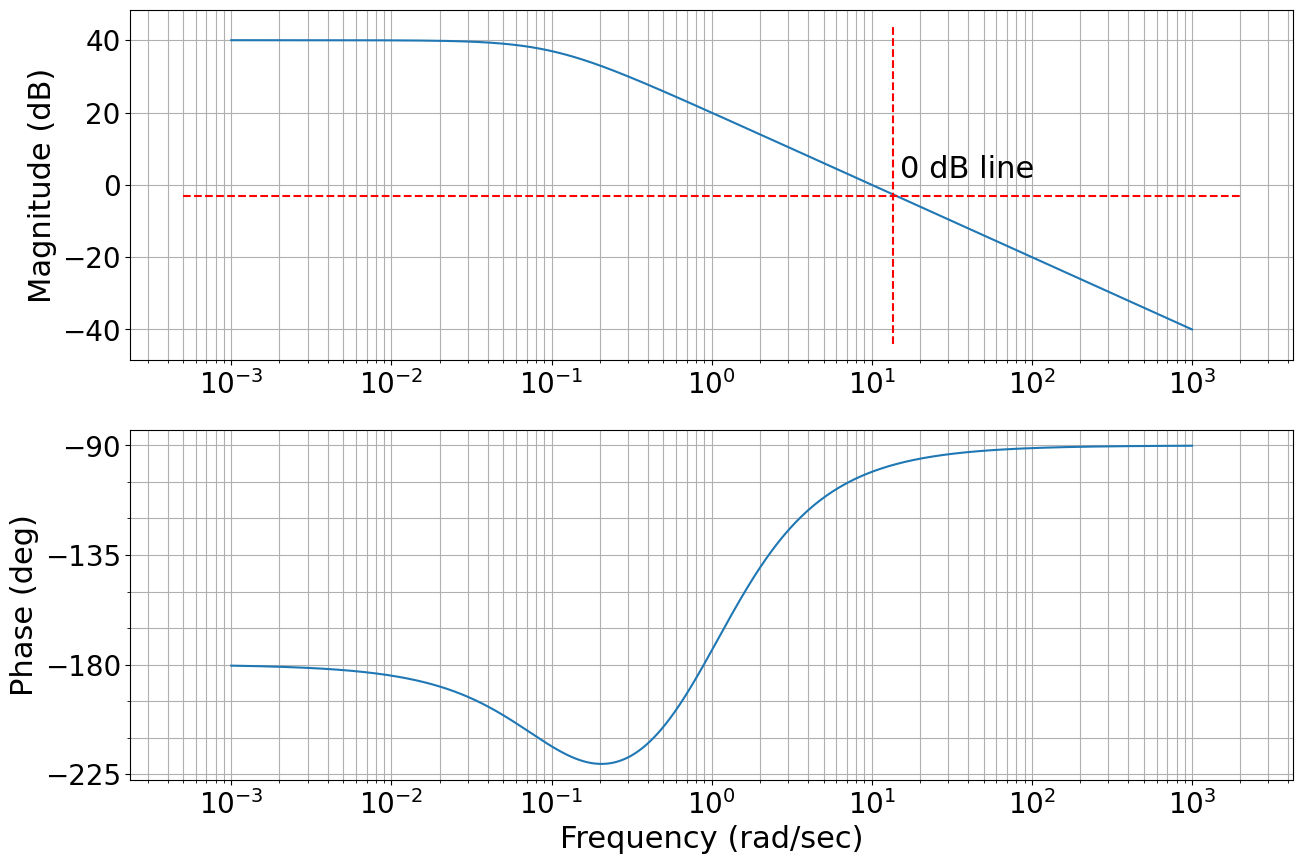

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
num = [10, 10]
den = [1, -0.9, -0.1]
control.bode_plot(control.tf(num, den), dB=True, omega_limits=(0.001, 1000));


ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-3, -3],'r--')
plt.plot([13.5, 13.5],plt.ylim(),'r--')
plt.text(15, 2, "0 dB line");

-3 dB Bandwidth (range of freq. for which gain > -3dB): $13$ rad/s 

#### Definition 2: Gain greater than 0 dB

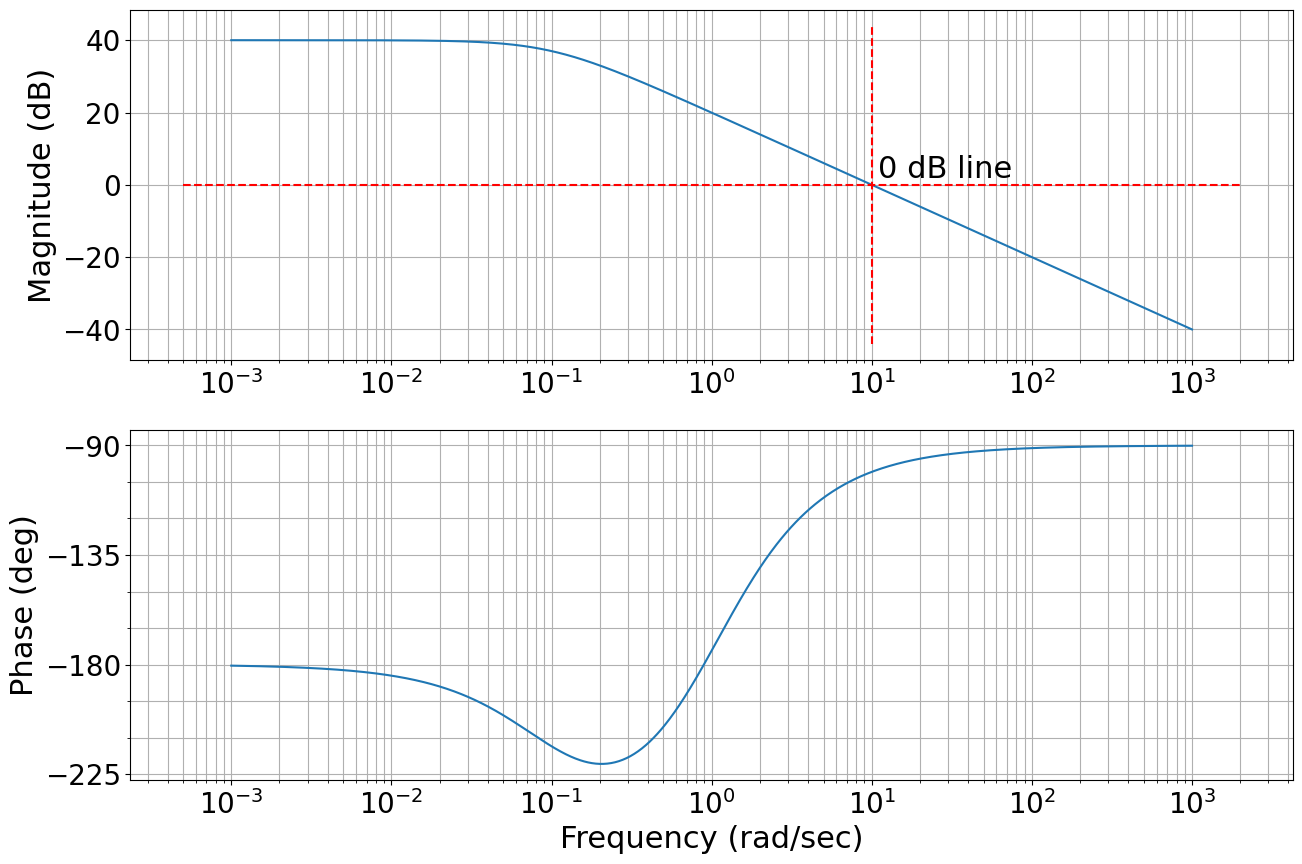

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
num = [10, 10]
den = [1, -0.9, -0.1]
control.bode_plot(control.tf(num, den), dB=True, omega_limits=(0.001, 1000));


ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[0, 0],'r--')
plt.plot([10, 10],plt.ylim(),'r--')
plt.text(11, 2, "0 dB line");

0 dB Bandwidth (range of freq. for which gain > 0): $10$ rad/s 

- Not too much difference


#### Definition 3: -3dB relative to steady state

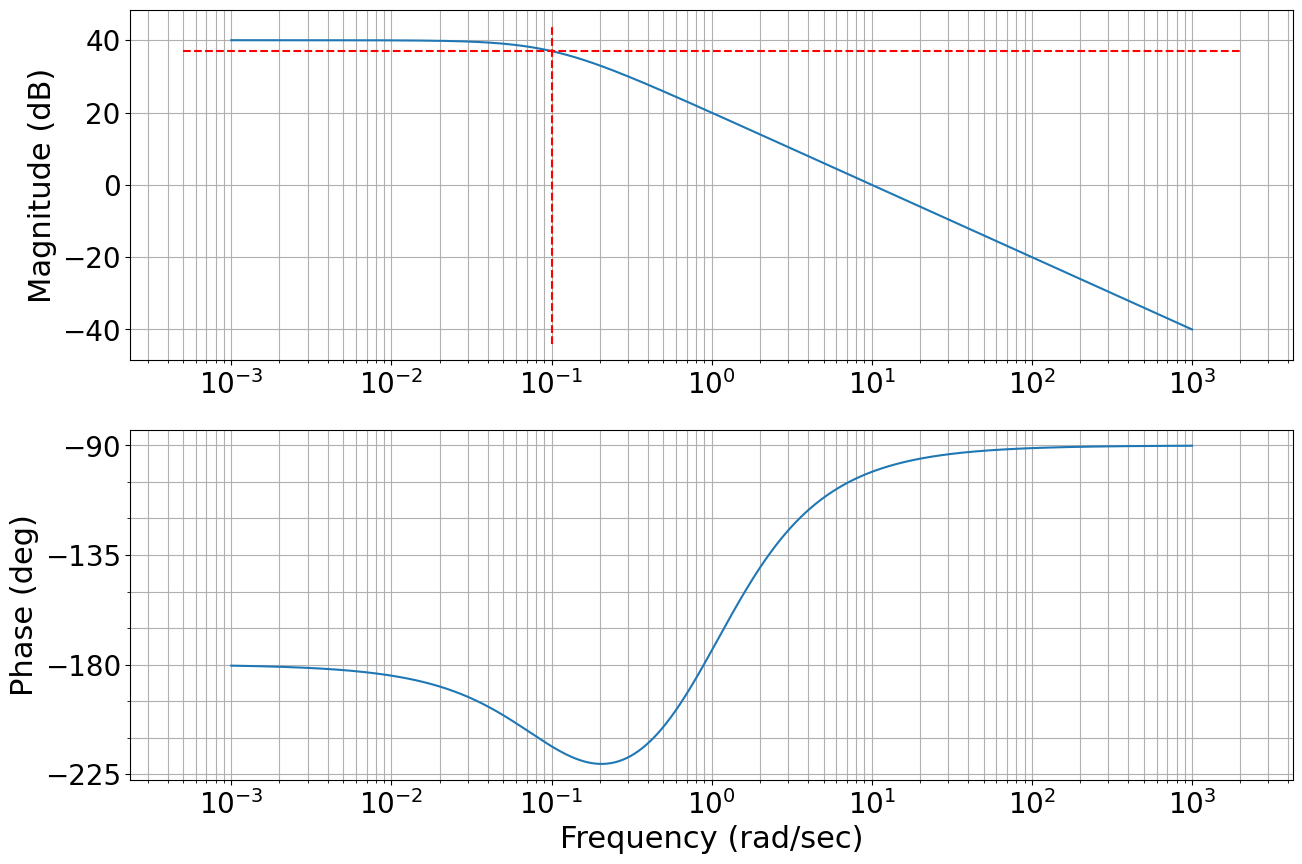

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
num = [10, 10]
den = [1, -0.9, -0.1]
control.bode_plot(control.tf(num, den), dB=True, omega_limits=(0.001, 1000));


ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[40-3, 40-3],'r--')
plt.plot([0.1, 0.1],plt.ylim(),'r--');

-3dB Bandwidth relative to low frequency, is $B=[0, 0.1] rad/s$

#### A different example

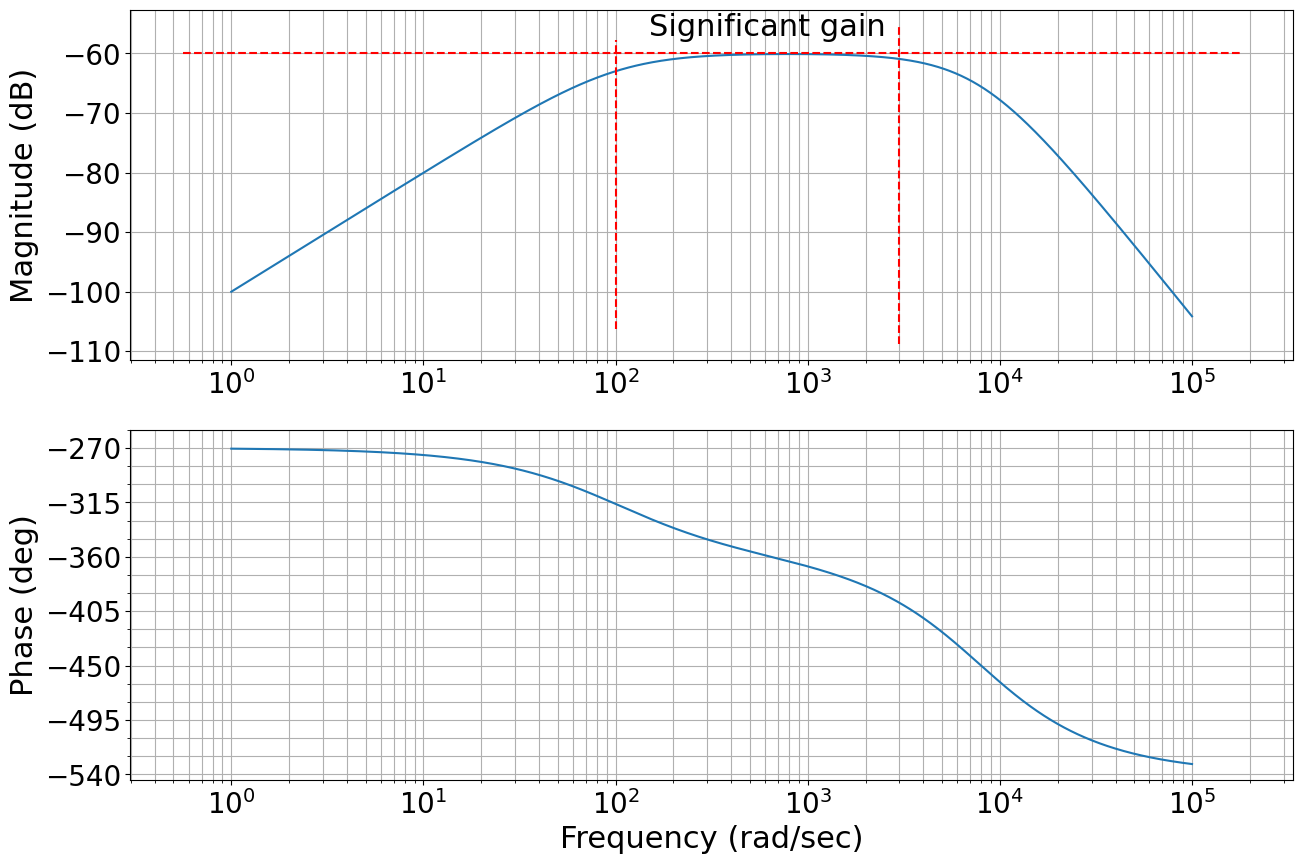

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
num = [2.5, 0]
den = [4e-5, 0.6, 2554, 250000]
control.bode_plot(control.tf(num, den), dB=True, omega_limits=(1, 100000));


ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-60, -60],'r--')
plt.plot([100, 100],plt.ylim(),'r--')
plt.plot([3000, 3000],plt.ylim(),'r--')
plt.text(150, -57, "Significant gain");

- The bandwidth $B=[100, 3000]$ rad/s
- Range of frequency where the gain is significant
- Usually easy to visually identify it

- Given a bandwidth $B=[0, \omega_b]$
- If the slope of the Gain diagram is -20 dB/decade beyond frequency $\omega_b$, then the system is behaving like a first-order system, with a pole in $\omega_b$.

- This means that the system transient response is characterised by a time constant $\tau = \frac{1}{\omega_b}$
- The system is hence the faster, the larger its bandwidth is
- The bandwidth is hence a good indicator of the velocity of the system

### Bandwidth and system response

- For first order systems the relationship between badnwidth and settling time is $$T_s = \frac{1}{w_b}$$
- Settling time is inversely proportional to the bandiwdth:
  - For first order systems the settling time $T_s$ is proportional to the time constant $\tau$, 
  - The bandwidth $w_b = \frac{1}{\tau}$
- Broadly speaking we can say (even for systems of order greater than 1) that the larger the bandwidth, the faster is the response (the shorter is the system settling time)

### Bandwidth in feedback systems

Given the system:

<tr>
    <td> <img src="img/bandiwdth-feedback-loop.png" alt="bandiwdth-feedback-loop" style="width: 550px;"/> </td>
</tr>


$$ 
Y(s) = \frac{GR}{1+GR} = G_{c} U(s)
$$


- For a closed-loop system it is normal to expect no offset for step targets, in steady-state
- This means $G_{c}(0) = 1$ or $0 \text{dB}$
- In this case, $B$ is when the gain drops $-3 \text{dB}$

For example:

- Given a system 

$$ G(s) = \frac{2}{s+4} $$

- and a compensator

$$ R(s) = 2\frac{s+2}{s} $$

The closed loop system is:

$$
G_{c} = \frac{GR}{1+GR}
$$

and is Bode plot is:

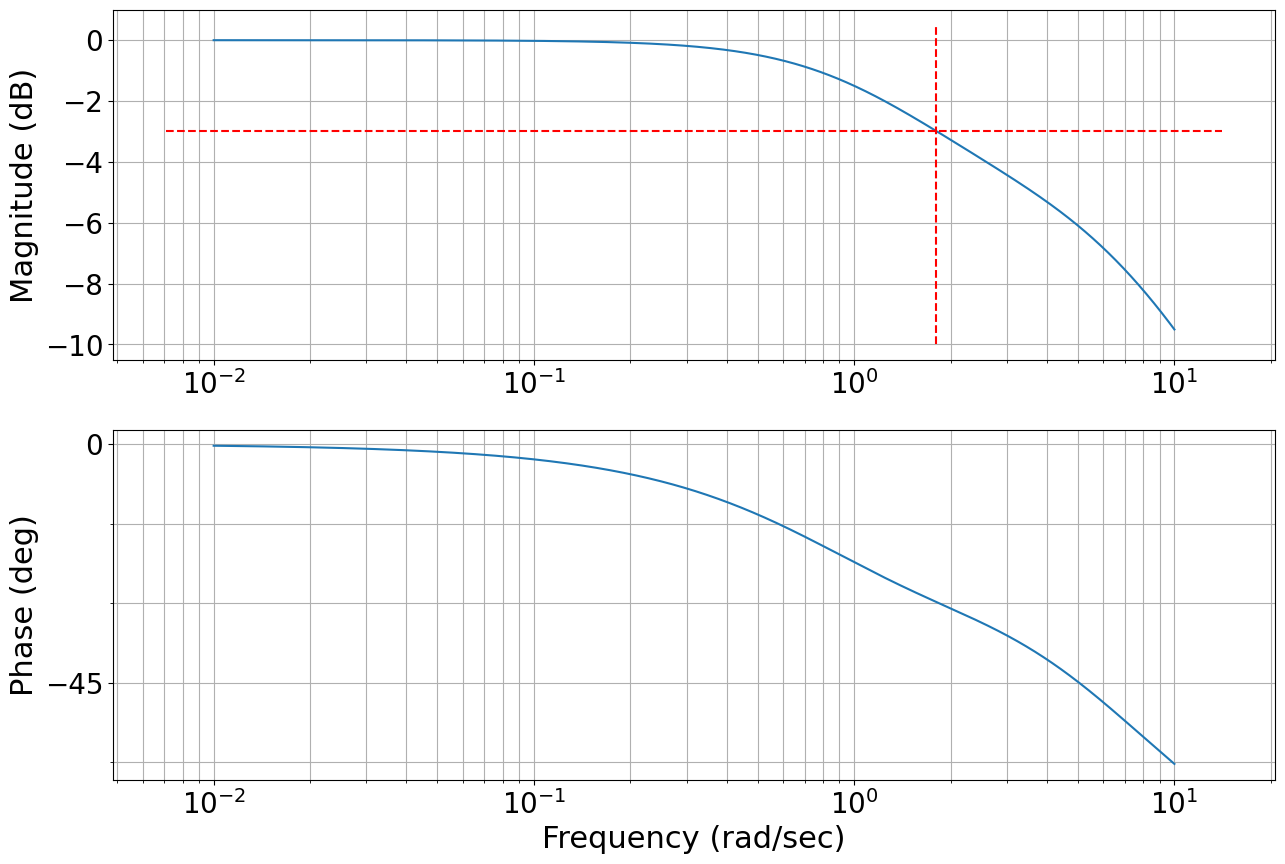

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

control.bode_plot(control.tf([4, 8],[1, 8, 8]), dB=True, omega_limits=(0.01, 10));

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[-3, -3],'r--')
plt.plot([1.8, 1.8],plt.ylim(),'r--');

- Bandwidth is about $2 \text{rad/s}$

In feedbak system, with high loop gain, the bandwidth of the closed loop system $G_c$ can be approximated by the knowledge of the loop gain function $GR$:

$$
G_c = \frac{RG}{1+RG} \approx
\begin{cases}
1 \;\; \text{if} \;\; |RG| \gg 1 \newline
RG \;\; \text{if} \;\; |RG| \ll 1
\end{cases}
$$


<tr>
    <td> <img src="img/close-loop-bandwidth.png" alt="close-loop-bandwidth" style="width: 550px;"/> </td>
</tr>



### Example

$$
G(s) = \frac{1000}{(s+1)^3(s+10)}
$$

$$
G_c(s) = \frac{G(s)}{1+G(s)}
$$



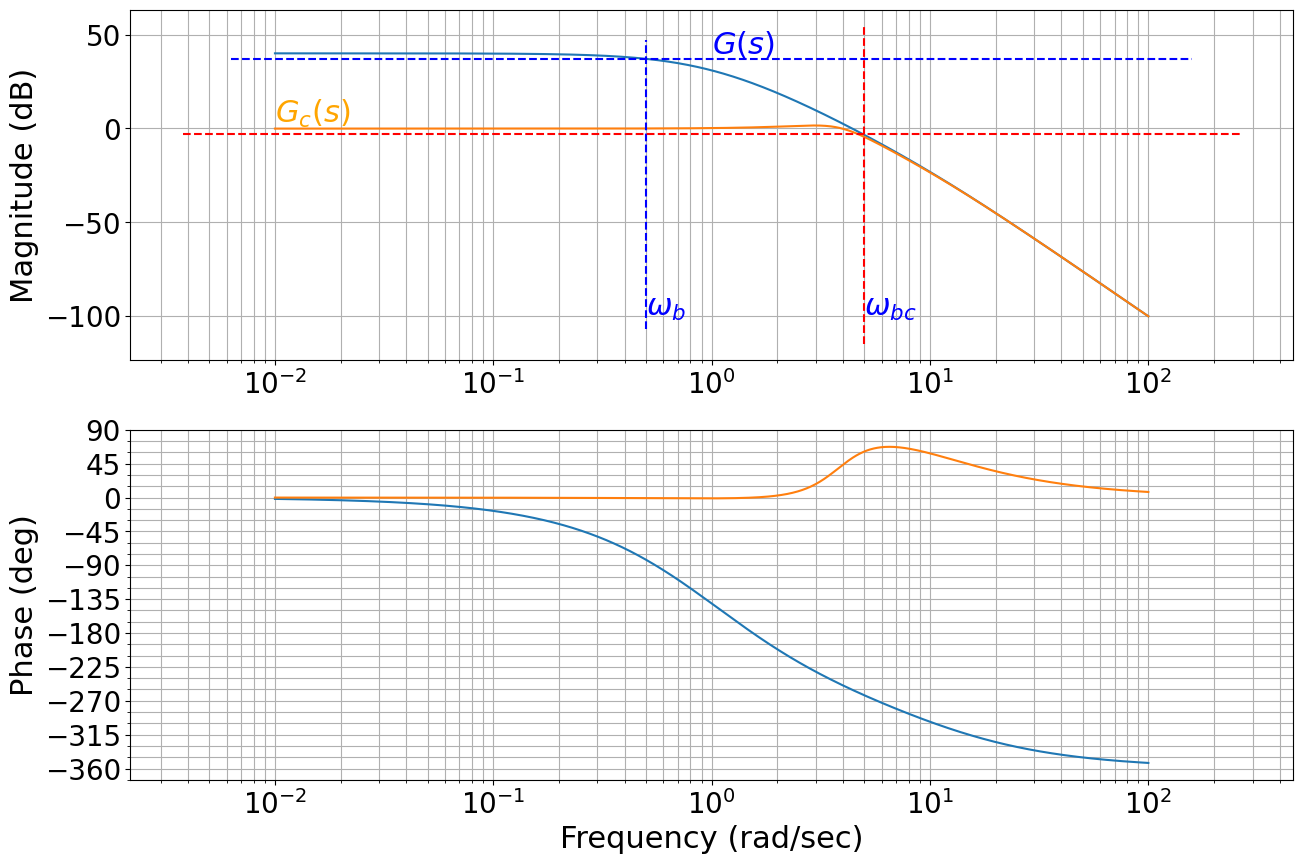

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))

mag_ol, phase_ol, omega_ol = control.bode(control.tf([1000],[1, 13, 33, 31, 10]), dB=True, omega_limits=(0.01, 100));
mag_cc, phase_cc, omega_cc = control.bode(control.tf([1000],[1, 13, 33, 31, 10+1000]), dB=True, omega_limits=(0.01, 100));

# bandwidth
ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.text(1, 40, '$G(s)$', color='blue')
plt.plot(plt.xlim(),[40-3, 40-3],'b--')
plt.plot([0.5, 0.5],plt.ylim(),'b--');
plt.text(0.5, -100, '$\omega_b$', color='blue')

plt.plot(plt.xlim(),[-3, -3],'r--')
plt.plot([5, 5],plt.ylim(),'r--')
plt.text(0.01, 3, '$G_c(s)$', color='orange')
plt.text(5, -100, '$\omega_{bc}$', color='blue');